In [1]:
import pandas as pd
from src.system import System
from src.sampler import MCMCSampler
from src.model import *
from src.priors import *
from src.results import *
import corner.corner as corner
import matplotlib.pyplot as plt
from WDPhotTools.fitter import WDfitter

In [6]:
ftr = WDfitter()
ftr.fit(atmosphere=["H"],
        filters=["H_mko", "G2_BP", "r_sdss"],
        mags=[13.208, 15.6, 14.976],
        mag_errors=[0.1, 0.1, 0.1],
        distance=10,
        distance_err=0.01,
        extinction_convolved=False,
        Rv=0.0,
        independent=["Teff", "mass"],
        initial_guess=[4300, 0.4],
        method="emcee",
        nwalkers=200,
        nsteps=2000,
        nburns=200,
        progress=True,
        kwargs_for_CT={"tol": 1e-12}
        )

c:\Users\user\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=24,12 m=148 fp=0.000188 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
  0%|          | 0/2000 [00:00<?, ?it/s]c:\Users\user\anaconda3\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 2000/2000 [02:47<00:00, 11.93it/s]


In [7]:
ftr.best_fit_params

{'H': {'Teff': 4414.2285104499815,
  'Teff_err': 22.544866087530636,
  'Teff_16': 30.576690154147855,
  'Teff_84': 14.513042020913417,
  'mass': 0.3672060467196563,
  'mass_err': 0.0015661112600083016,
  'mass_16': 0.0016033043472064024,
  'mass_84': 0.0015289181728102008,
  'H_mko': 13.217972301252242,
  'distance': 10,
  'dist_mod': 0.0,
  'G2_BP': 15.598767985552684,
  'r_sdss': 15.007890955544827,
  'Av_H_mko': 0.0,
  'Av_G2_BP': 0.0,
  'Av_r_sdss': 0.0,
  'Mbol': 14.96149540865956,
  'age': 4073444609.288722},
 'He': {}}

Expected: 
- 0.3 Msolar 
- 4250 K Teff
- 3.56 e9 age

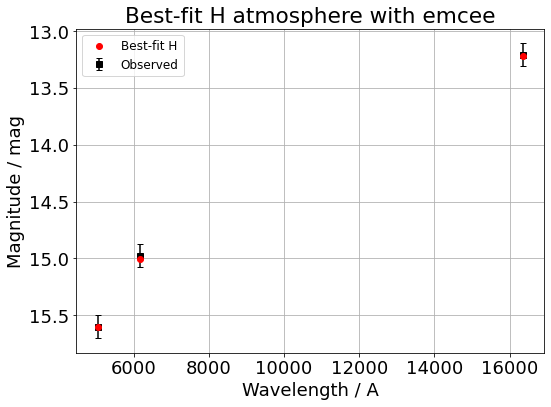

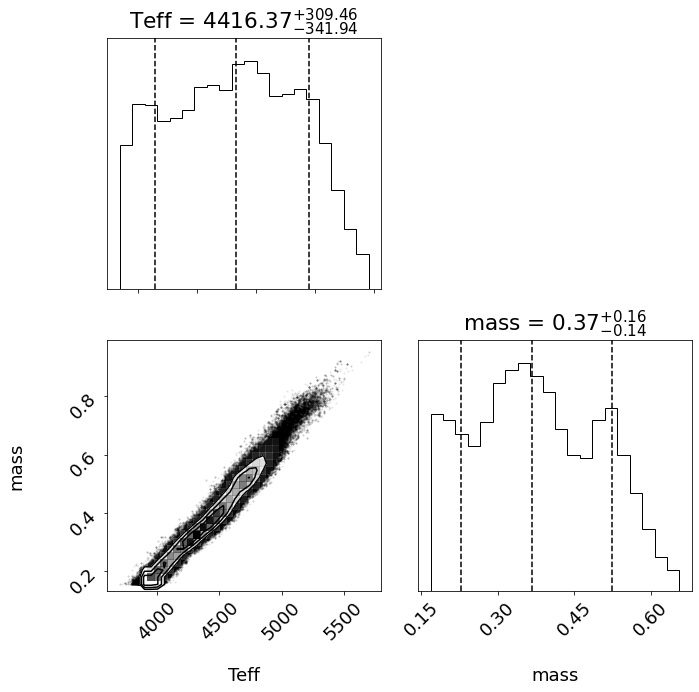

[<Figure size 720x720 with 4 Axes>]

In [8]:
ftr.show_best_fit(display=False)
ftr.show_corner_plot(
    figsize=(10, 10),
    display=True,
    kwarg={
        "quantiles": [0.158655, 0.5, 0.841345],
        "show_titles": True,
    },
)
